In [401]:
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as mtransforms
from scipy.stats import binned_statistic_2d
from astropy.coordinates import SkyCoord, Galactocentric
from astropy import units as u
import numpy as np
from scipy import stats
from matplotlib.gridspec import GridSpec

plt.style.use('/Users/sara/PycharmProjects/specparam/notebook/mystyle.mplstyle')

In [2]:
# ra = data['ra'].to_numpy()
# dec = data['dec'].to_numpy()
# distance = data['cnn_distance'].to_numpy()
# 
# c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, distance=distance*u.pc)
# gc = c.transform_to(Galactocentric())
# x = gc.cartesian.x
# y = gc.cartesian.y
# z = gc.cartesian.z
# r = np.sqrt(x**2 + y**2)
# 
# data['X'] = x.value
# data['Y'] = y.value
# data['Z'] = z.value
# data['R'] = r.value
# data.to_csv('/Users/sara/PycharmProjects/specparam/data/final product/solar_like_param_LAMOST_DR9_v3.csv', index=False)

data = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/solar_like_param_LAMOST_DR9_v3.csv')
data.columns

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/2859411741.py:1: DtypeWarning: Columns (28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/solar_like_param_LAMOST_DR9_v3.csv')


Index(['obsid', 'ra', 'dec', 'snrg', 'snrr', 'flag', 'cnn_teff', 'cnn_logg',
       'cnn_feh', 'cnn_mg', 'cnn_bprp', 'cnn_distance', 'lasp_teff',
       'lasp_teff_err', 'lasp_logg', 'lasp_logg_err', 'lasp_feh',
       'lasp_feh_err', 'lasp_rv', 'lasp_rv_err', 'gaia_source_id', 'parallax',
       'parallax_over_error', 'parallax_zeropoint', 'parallax_correction',
       'gaia_g_mean_mag', 'gaia_bp_rp', 'r_med_geo', 'APOGEE_ID', 'STARFLAG',
       'PARAMFLAG', 'ASPCAPFLAG', 'apogee_teff', 'apogee_teff_err',
       'apogee_logg', 'apogee_logg_err', 'apogee_feh', 'apogee_feh_err',
       '2MASS_star_id', 'GALAH_sobject_id', 'flag_sp', 'red_flag', 'flag_fe_h',
       'galah_teff', 'galah_e_teff', 'galah_logg', 'galah_e_logg',
       'galah_fe_h', 'galah_e_fe_h', 'X', 'Y', 'Z', 'R'],
      dtype='object')

# Spatial distribution

In [139]:
x = data['X']/1000
y = data['Y']/1000
z = data['Z']/1000
r = data['R']/1000
feh = data['cnn_feh']

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/263807107.py:21: RuntimeWarning: divide by zero encountered in log10
  log_h_xy1 = np.log10(h_xy1.T)
/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/263807107.py:61: RuntimeWarning: divide by zero encountered in log10
  log_h_rz1 = np.log10(h_rz1.T)


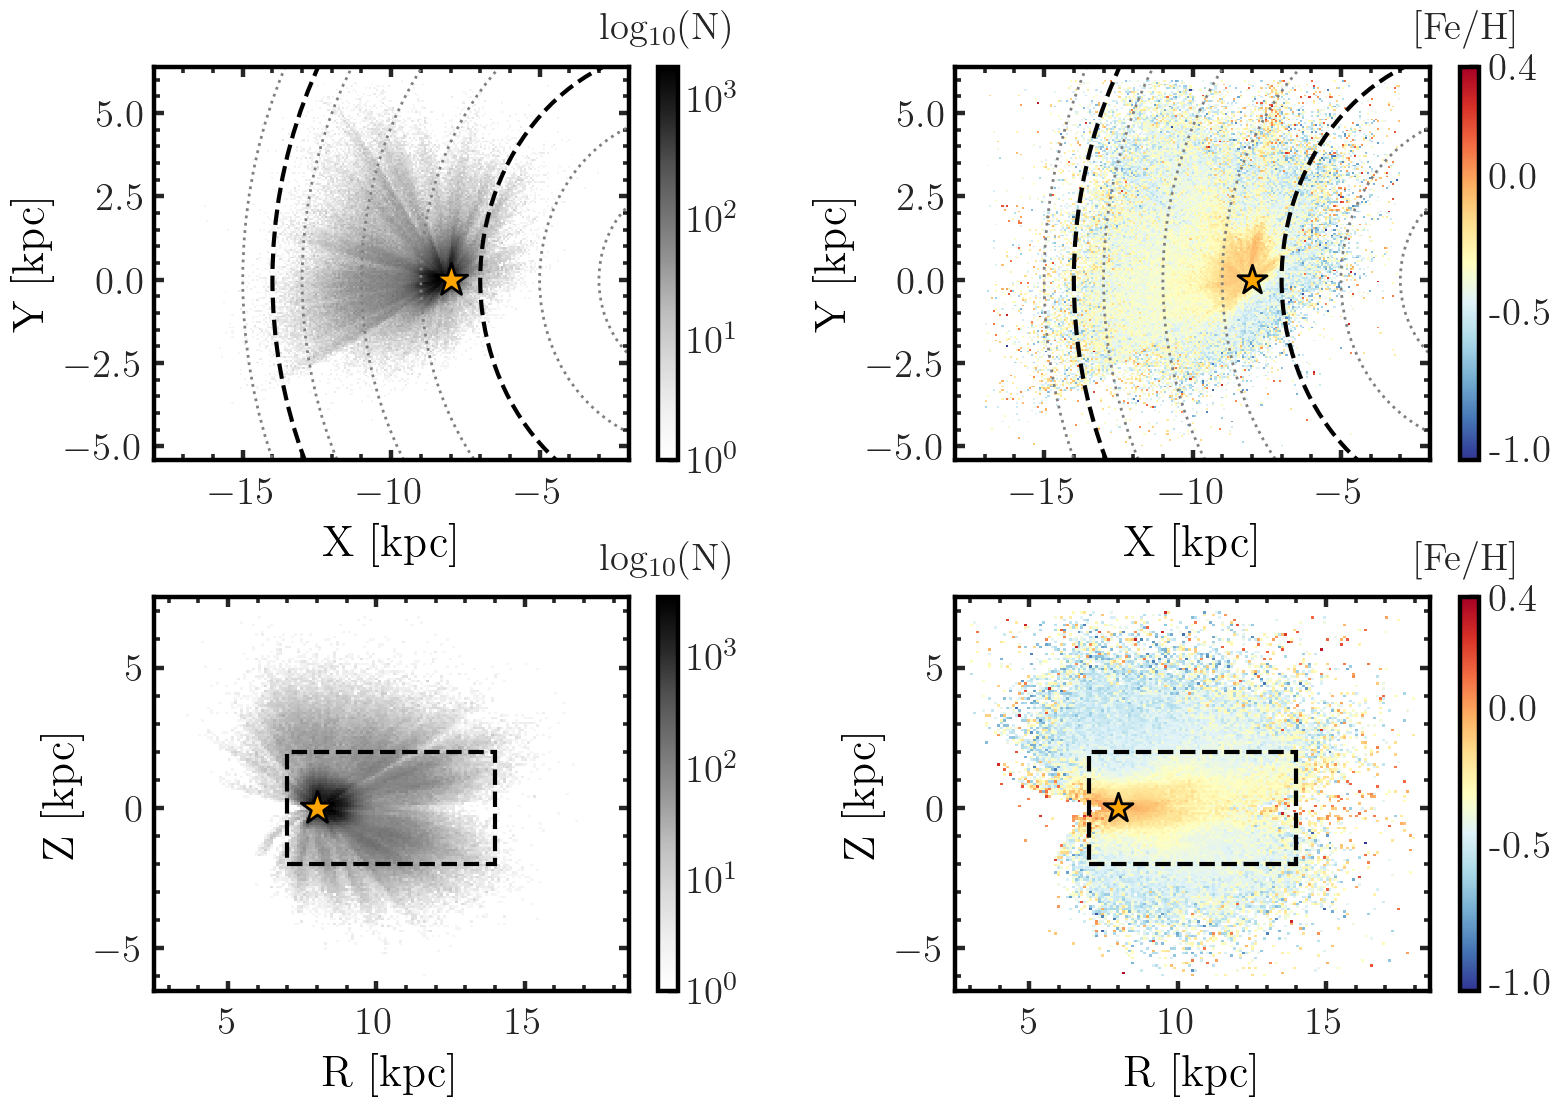

In [397]:
fig = plt.figure(figsize=(9, 6.), dpi=200)
gs = GridSpec(2, 2, figure=fig, hspace=0.35, wspace=0.35)

cmap1 = plt.cm.Greys
cmap1.set_bad(color='white')  # 设置空值颜色为白色
cmap2 = plt.cm.RdYlBu_r #RdYlBu_r
cmap2.set_bad(color='white')  # 设置空值颜色为白色

bins1 = 200
bins2 = 150
minnum = 1
bins_xy = [np.linspace(-17, -3, bins1), np.linspace(-5, 6, bins1)]
bins_rz = [np.linspace(3, 18, bins2), np.linspace(-6, 7, bins2)]

cbar_fontsize=14

# Number density in X-Y plane
ax_xy1 = fig.add_subplot(gs[0, 0])
h_xy1, xe1, ye1 = np.histogram2d(x, y, bins=bins_xy)
h_xy1 = np.ma.masked_where(h_xy1 < minnum, h_xy1)
log_h_xy1 = np.log10(h_xy1.T)
c_xy1 = ax_xy1.pcolormesh(xe1, ye1, log_h_xy1, cmap=cmap1)
cbar1 = fig.colorbar(c_xy1, ax=ax_xy1)
# 手动设置colorbar的刻度和标签
cbar1.set_ticks([0, 1, 2, 3])
cbar1.set_ticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$'])
cbar1.ax.set_title('log$_{10}$(N)', pad=10, fontsize=cbar_fontsize)
# 半径
radii = [1, 3, 5, 7, 9, 11, 13, 14, 15]
for radius in radii:
    if radius in [7, 14]:
        circle = plt.Circle((0, 0), radius, color='k', fill=False, linestyle='--', linewidth=1.5)
    else:
        circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle=':', linewidth=1)
    ax_xy1.add_artist(circle)

# [Fe/H] in X-Y plane
ax_xy2 = fig.add_subplot(gs[0, 1])
h_xy2, xe2, ye2, binnumber1 = binned_statistic_2d(x, y, feh, statistic='median', bins=bins_xy)
# h_xy2 = np.where(h_xy2 < -0.98, -0.98, h_xy2)
# h_xy2 = np.where(h_xy2 > 0.45, 0.45, h_xy2)
c_xy2 = ax_xy2.pcolormesh(xe2, ye2, h_xy2.T, cmap=cmap2, vmax=0.4)  # , vmin=-1.1, vmax=0.4 , vmax=np.max(h_xy2[~np.isnan(h_xy2)]), vmin=np.min(h_xy2[~np.isnan(h_xy2)])
cbar2 = fig.colorbar(c_xy2, ax=ax_xy2)
# 手动设置colorbar的刻度和标签
cbar2.set_ticks([-1.0, -0.5, 0.0, 0.4])
cbar2.set_ticklabels([-1.0, -0.5, 0.0, 0.4])
cbar2.ax.set_title('[Fe/H]', pad=10, fontsize=cbar_fontsize)
# 半径
radii = [1, 3, 5, 7, 9, 11, 13, 14, 15]
for radius in radii:
    if radius in [7, 14]:
        circle = plt.Circle((0, 0), radius, color='k', fill=False, linestyle='--', linewidth=1.5)
    else:
        circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle=':', linewidth=1)
    ax_xy2.add_artist(circle)

# Number density in R-Z plane
ax_rz1 = fig.add_subplot(gs[1, 0])
h_rz1, re1, ze1 = np.histogram2d(r, z, bins=bins_rz)
h_rz1 = np.ma.masked_where(h_rz1 < minnum, h_rz1)
log_h_rz1 = np.log10(h_rz1.T)
c_rz1 = ax_rz1.pcolormesh(re1, ze1, log_h_rz1, cmap=cmap1)
cbar3 = fig.colorbar(c_rz1, ax=ax_rz1)
# 手动设置colorbar的刻度和标签
cbar3.set_ticks([0, 1, 2, 3])
cbar3.set_ticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$'])
cbar3.ax.set_title('log$_{10}$(N)', pad=10, fontsize=cbar_fontsize)
# 画区域
# (7,-2) 是矩形左下角的坐标，7 是矩形的宽度，4 是矩形的高度
rect = patches.Rectangle((7, -2), 7, 4, edgecolor='k', facecolor='none', linestyle='--', linewidth=1.5)
ax_rz1.add_patch(rect)


# [Fe/H] in R-Z plane
ax_rz2 = fig.add_subplot(gs[1, 1])
h_rz2, re2, ze2, binnumber2 = binned_statistic_2d(r, z, feh, statistic='median', bins=bins_rz)
# h_rz2 = np.where(h_rz2 < -0.98, -0.98, h_rz2)
# h_rz2 = np.where(h_rz2 > 0.45, 0.45, h_rz2)
c_rz2 = ax_rz2.pcolormesh(re2, ze2, h_rz2.T, cmap=cmap2, vmax=0.4) #, , vmax=np.max(h_xy2[~np.isnan(h_xy2)]), vmin=np.min(h_xy2[~np.isnan(h_xy2)])
cbar4 = fig.colorbar(c_rz2, ax=ax_rz2)
# 手动设置colorbar的刻度和标签
cbar4.set_ticks([-1.0, -0.5, 0.0, 0.4])
cbar4.set_ticklabels([-1.0, -0.5, 0.0, 0.4])
cbar4.ax.set_title('[Fe/H]', pad=10, fontsize=cbar_fontsize)
# 画区域
rect = patches.Rectangle((7, -2), 7, 4, edgecolor='k', facecolor='none', linestyle='--', linewidth=1.5)
ax_rz2.add_patch(rect)

label_fontsize=16
ax_xy1.set_xlabel('X [kpc]', fontsize=label_fontsize)
ax_xy1.set_ylabel('Y [kpc]', fontsize=label_fontsize)
ax_xy2.set_xlabel('X [kpc]', fontsize=label_fontsize)
ax_xy2.set_ylabel('Y [kpc]', fontsize=label_fontsize)
ax_rz1.set_xlabel('R [kpc]', fontsize=label_fontsize)
ax_rz1.set_ylabel('Z [kpc]', fontsize=label_fontsize)
ax_rz2.set_xlabel('R [kpc]', fontsize=label_fontsize)
ax_rz2.set_ylabel('Z [kpc]', fontsize=label_fontsize)

xlim = (-18, -2)
ylim = (-5.4, 6.4)
ax_xy1.set_xlim(xlim)
ax_xy1.set_ylim(ylim)
ax_xy2.set_xlim(xlim)
ax_xy2.set_ylim(ylim)

rlim = (2.5, 18.5)
zlim = (-6.5, 7.5)
ax_rz1.set_xlim(rlim)
ax_rz1.set_ylim(zlim)
ax_rz2.set_xlim(rlim)
ax_rz2.set_ylim(zlim)

# 画太阳
ax_xy1.scatter(-8, 0, s=150, c='orange', marker='*', label='Sun', edgecolors='k')
ax_xy2.scatter(-8, 0, s=120, c='orange', marker='*', label='Sun', edgecolors='k')
ax_rz1.scatter(8, 0, s=150, c='orange', marker='*', label='Sun', edgecolors='k')
ax_rz2.scatter(8, 0, s=120, c='orange', marker='*', label='Sun', edgecolors='k')

## Number density

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/311360298.py:21: RuntimeWarning: divide by zero encountered in log10
  log_h_xy1 = np.log10(h_xy1.T)
/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/311360298.py:42: RuntimeWarning: divide by zero encountered in log10
  log_h_rz1 = np.log10(h_rz1.T)


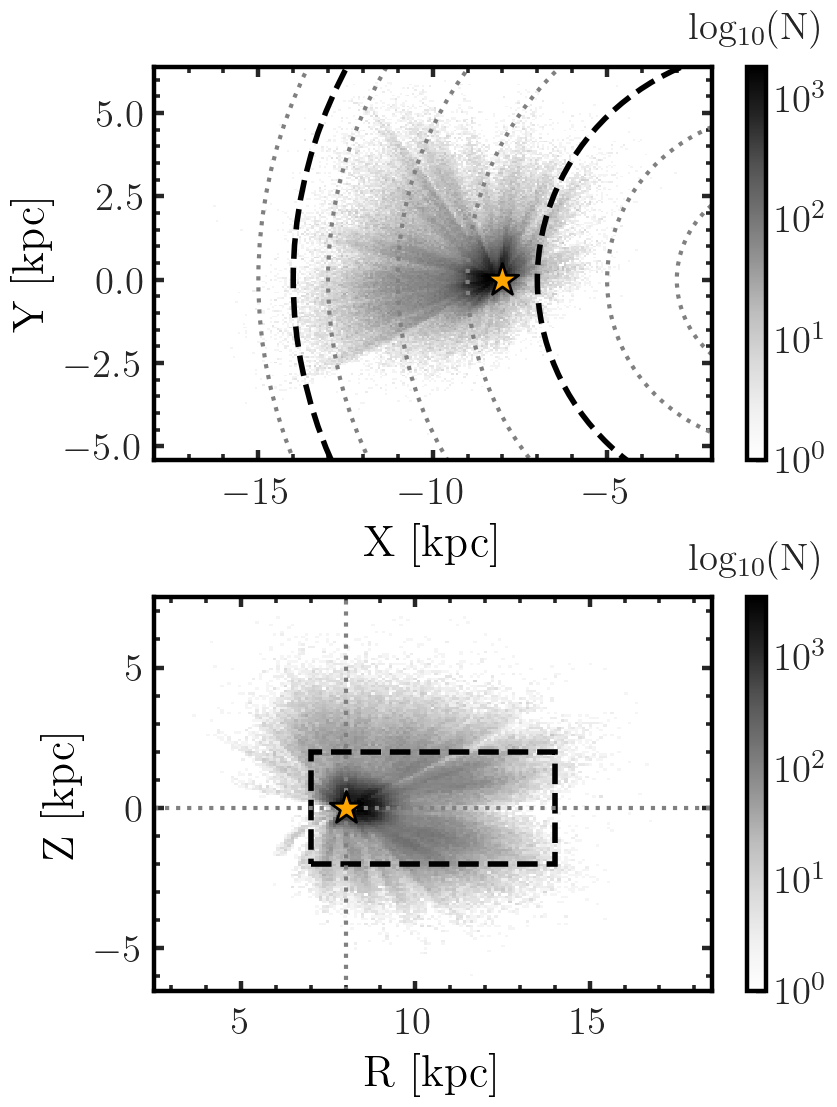

In [496]:
fig = plt.figure(figsize=(4.5, 6.), dpi=200)
gs = GridSpec(2, 1, figure=fig, hspace=0.35, wspace=0.35)

cmap1 = plt.cm.Greys
cmap1.set_bad(color='white')  # 设置空值颜色为白色
cmap2 = plt.cm.RdYlBu_r #RdYlBu_r
cmap2.set_bad(color='white')  # 设置空值颜色为白色

bins1 = 200
bins2 = 150
minnum = 1
bins_xy = [np.linspace(-17, -3, bins1), np.linspace(-5, 6, bins1)]
bins_rz = [np.linspace(3, 18, bins2), np.linspace(-6, 7, bins2)]

cbar_fontsize=14

# Number density in X-Y plane
ax_xy1 = fig.add_subplot(gs[0, 0])
h_xy1, xe1, ye1 = np.histogram2d(x, y, bins=bins_xy)
h_xy1 = np.ma.masked_where(h_xy1 < minnum, h_xy1)
log_h_xy1 = np.log10(h_xy1.T)
c_xy1 = ax_xy1.pcolormesh(xe1, ye1, log_h_xy1, cmap=cmap1)
cbar1 = fig.colorbar(c_xy1, ax=ax_xy1)
# 手动设置colorbar的刻度和标签
cbar1.set_ticks([0, 1, 2, 3])
cbar1.set_ticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$'])
cbar1.ax.set_title('log$_{10}$(N)', pad=10, fontsize=cbar_fontsize)
# 半径
radii = [1, 3, 5, 7, 9, 11, 13, 14, 15]
for radius in radii:
    if radius in [7, 14]:
        circle = plt.Circle((0, 0), radius, color='k', fill=False, linestyle='--', linewidth=2)
    else:
        circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle=':', linewidth=1.5)
    ax_xy1.add_artist(circle)


# Number density in R-Z plane
ax_rz1 = fig.add_subplot(gs[1, 0])
h_rz1, re1, ze1 = np.histogram2d(r, z, bins=bins_rz)
h_rz1 = np.ma.masked_where(h_rz1 < minnum, h_rz1)
log_h_rz1 = np.log10(h_rz1.T)
c_rz1 = ax_rz1.pcolormesh(re1, ze1, log_h_rz1, cmap=cmap1)
cbar3 = fig.colorbar(c_rz1, ax=ax_rz1)
# 手动设置colorbar的刻度和标签
cbar3.set_ticks([0, 1, 2, 3])
cbar3.set_ticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$'])
cbar3.ax.set_title('log$_{10}$(N)', pad=10, fontsize=cbar_fontsize)
# 画区域
# (7,-2) 是矩形左下角的坐标，7 是矩形的宽度，4 是矩形的高度
rect = patches.Rectangle((7, -2), 7, 4, edgecolor='k', facecolor='none', linestyle='--', linewidth=2)
ax_rz1.add_patch(rect)



label_fontsize=16
ax_xy1.set_xlabel('X [kpc]', fontsize=label_fontsize)
ax_xy1.set_ylabel('Y [kpc]', fontsize=label_fontsize)
ax_rz1.set_xlabel('R [kpc]', fontsize=label_fontsize)
ax_rz1.set_ylabel('Z [kpc]', fontsize=label_fontsize)

xlim = (-18, -2)
ylim = (-5.4, 6.4)
ax_xy1.set_xlim(xlim)
ax_xy1.set_ylim(ylim)

rlim = (2.5, 18.5)
zlim = (-6.5, 7.5)
ax_rz1.set_xlim(rlim)
ax_rz1.set_ylim(zlim)

# 画太阳
ax_xy1.scatter(-8, 0, s=150, c='orange', marker='*', label='Sun', edgecolors='k')
ax_rz1.scatter(8, 0, s=150, c='orange', marker='*', label='Sun', edgecolors='k', zorder=10)
ax_rz1.axhline(0, color='grey', linestyle=':', linewidth=1.5)
ax_rz1.axvline(8, color='grey', linestyle=':', linewidth=1.5)

fig.savefig('../figure/xyz_density.png', bbox_inches=None)

## Metallicity

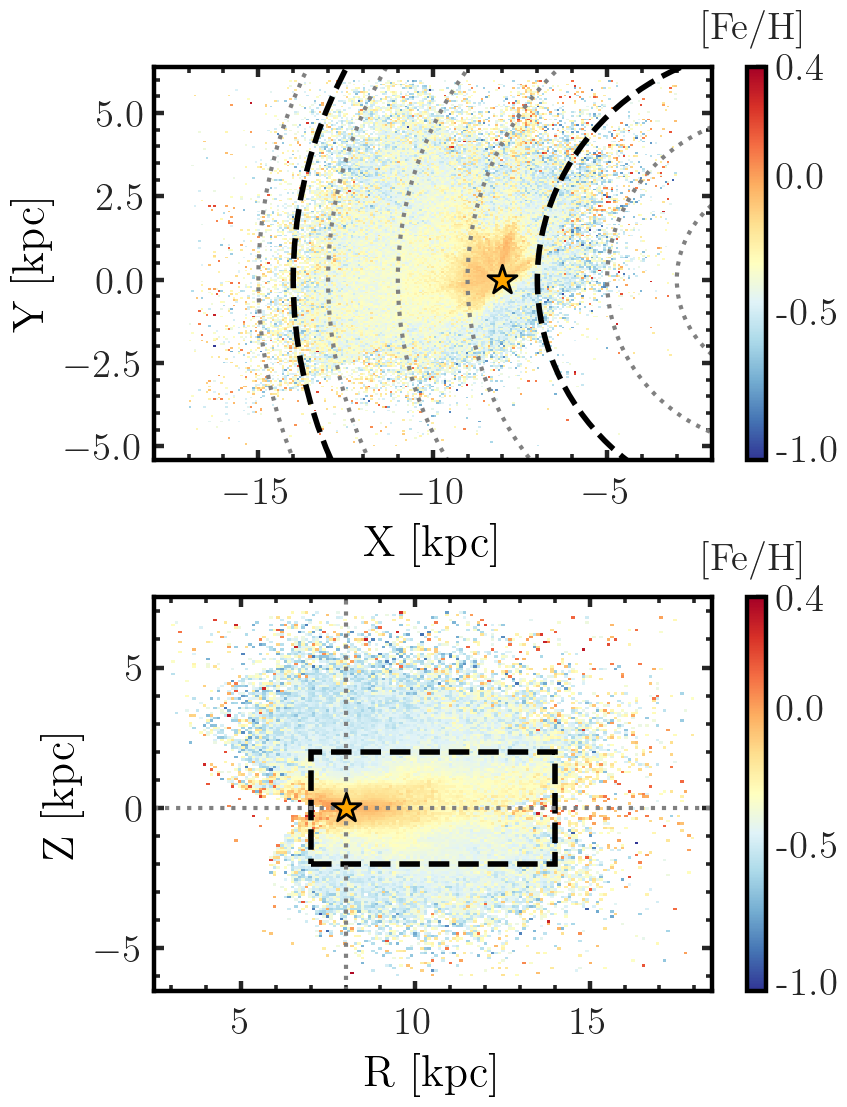

In [451]:
fig = plt.figure(figsize=(4.5, 6.), dpi=200)
gs = GridSpec(2, 1, figure=fig, hspace=0.35, wspace=0.35)

cmap1 = plt.cm.Greys
cmap1.set_bad(color='white')  # 设置空值颜色为白色
cmap2 = plt.cm.RdYlBu_r #RdYlBu_r
cmap2.set_bad(color='white')  # 设置空值颜色为白色

bins1 = 200
bins2 = 150
minnum = 1
bins_xy = [np.linspace(-17, -3, bins1), np.linspace(-5, 6, bins1)]
bins_rz = [np.linspace(3, 18, bins2), np.linspace(-6, 7, bins2)]

cbar_fontsize=14


# [Fe/H] in X-Y plane
ax_xy2 = fig.add_subplot(gs[0, 0])
h_xy2, xe2, ye2, binnumber1 = binned_statistic_2d(x, y, feh, statistic='median', bins=bins_xy)
# h_xy2 = np.where(h_xy2 < -0.98, -0.98, h_xy2)
# h_xy2 = np.where(h_xy2 > 0.45, 0.45, h_xy2)
c_xy2 = ax_xy2.pcolormesh(xe2, ye2, h_xy2.T, cmap=cmap2, vmax=0.4)  # , vmin=-1.1, vmax=0.4 , vmax=np.max(h_xy2[~np.isnan(h_xy2)]), vmin=np.min(h_xy2[~np.isnan(h_xy2)])
cbar2 = fig.colorbar(c_xy2, ax=ax_xy2)
# 手动设置colorbar的刻度和标签
cbar2.set_ticks([-1.0, -0.5, 0.0, 0.4])
cbar2.set_ticklabels([-1.0, -0.5, 0.0, 0.4])
cbar2.ax.set_title('[Fe/H]', pad=10, fontsize=cbar_fontsize)
# 半径
radii = [1, 3, 5, 7, 9, 11, 13, 14, 15]
for radius in radii:
    if radius in [7, 14]:
        circle = plt.Circle((0, 0), radius, color='k', fill=False, linestyle='--', linewidth=2)
    else:
        circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle=':', linewidth=1.5)
    ax_xy2.add_artist(circle)



# [Fe/H] in R-Z plane
ax_rz2 = fig.add_subplot(gs[1, 0])
h_rz2, re2, ze2, binnumber2 = binned_statistic_2d(r, z, feh, statistic='median', bins=bins_rz)
# h_rz2 = np.where(h_rz2 < -0.98, -0.98, h_rz2)
# h_rz2 = np.where(h_rz2 > 0.45, 0.45, h_rz2)
c_rz2 = ax_rz2.pcolormesh(re2, ze2, h_rz2.T, cmap=cmap2, vmax=0.4) #, , vmax=np.max(h_xy2[~np.isnan(h_xy2)]), vmin=np.min(h_xy2[~np.isnan(h_xy2)])
cbar4 = fig.colorbar(c_rz2, ax=ax_rz2)
# 手动设置colorbar的刻度和标签
cbar4.set_ticks([-1.0, -0.5, 0.0, 0.4])
cbar4.set_ticklabels([-1.0, -0.5, 0.0, 0.4])
cbar4.ax.set_title('[Fe/H]', pad=10, fontsize=cbar_fontsize)
# 画区域
rect = patches.Rectangle((7, -2), 7, 4, edgecolor='k', facecolor='none', linestyle='--', linewidth=2)
ax_rz2.add_patch(rect)

label_fontsize=16
ax_xy2.set_xlabel('X [kpc]', fontsize=label_fontsize)
ax_xy2.set_ylabel('Y [kpc]', fontsize=label_fontsize)
ax_rz2.set_xlabel('R [kpc]', fontsize=label_fontsize)
ax_rz2.set_ylabel('Z [kpc]', fontsize=label_fontsize)

xlim = (-18, -2)
ylim = (-5.4, 6.4)
ax_xy2.set_xlim(xlim)
ax_xy2.set_ylim(ylim)

rlim = (2.5, 18.5)
zlim = (-6.5, 7.5)
ax_rz2.set_xlim(rlim)
ax_rz2.set_ylim(zlim)

# 画太阳
ax_rz2.axvline(8, color='grey', linestyle=':', linewidth=1.5)
ax_rz2.axhline(0, color='grey', linestyle=':', linewidth=1.5)
ax_xy2.scatter(-8, 0, s=120, c='orange', marker='*', label='Sun', edgecolors='k')
ax_rz2.scatter(8, 0, s=120, c='orange', marker='*', label='Sun', edgecolors='k', zorder=10)

fig.savefig('../figure/xyz_metallicity.png', bbox_inches=None)

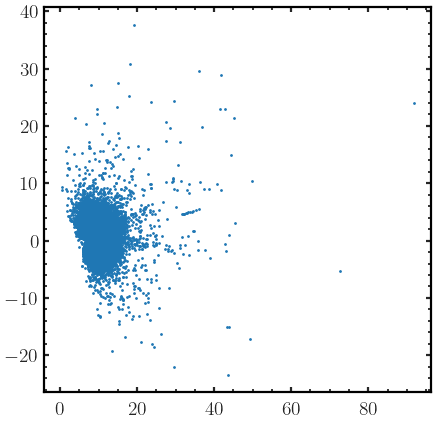

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(r/1000, z/1000, s=1)

NameError: name 'np' is not defined

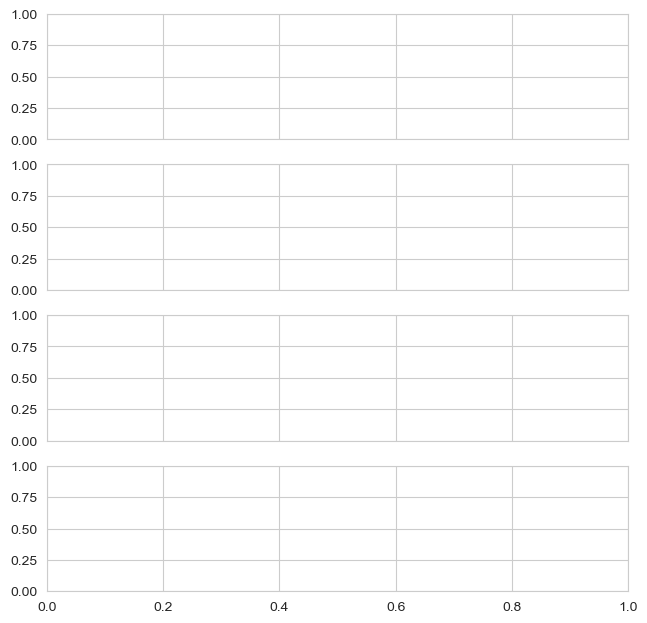

In [3]:
# curve_fit
def f_1(x,a,b):
    return a*x + b

fig, axs = plt.subplots(4, 1, figsize=(7.5, 7.5), sharex=True)
fontdict = {'size':14, 'color':'k', 'family':'serif'}
zbin = [1.5,1.0,0.5,0.25,0.15]
for i in range(4):
    r1 = test[(test['cnn1_R'] / 1000 <= 20) & ((abs(test['cnn1_Z'] / 1000) < zbin[i]) & (abs(test['cnn1_Z'] / 1000) > zbin[i + 1]))]['cnn1_R'] / 1000
    # r2 = test[(test['cnn2_R'] / 1000 <= 20) & ((abs(test['cnn2_Z'] / 1000) < zbin[i]) & (abs(test['cnn2_Z'] / 1000) > zbin[i + 1]))]['cnn2_R'] / 1000
    feh1 = test[(test['cnn1_R'] / 1000 <= 20) & ((abs(test['cnn1_Z'] / 1000) < zbin[i]) & (abs(test['cnn1_Z'] / 1000) > zbin[i + 1]))]['cnn1_feh']
    # feh2 = test[(test['cnn2_R'] / 1000 <= 20) & ((abs(test['cnn2_Z'] / 1000) < zbin[i]) & (abs(test['cnn2_Z'] / 1000) > zbin[i + 1]))]['cnn2_feh']
    
    # 分 bin 并计算 FEH 的均值和方差
    step = 1.0  # 步长为 1
    bins = np.arange(0, 12 + step, step)
    indices1 = np.digitize(r1, bins)
    indices2 = np.digitize(r2, bins)
    feh_mean1 = [feh1[indices1 == j].mean() for j in range(1, len(bins))]
    feh_std1 = [feh1[indices1 == j].std() for j in range(1, len(bins))]
    feh_mean2 = [feh2[indices2 == j].mean() for j in range(1, len(bins))]
    feh_std2 = [feh2[indices2 == j].std() for j in range(1, len(bins))]
    
    out1 = r1 > 12
    out2 = r2 > 12
    
    # 计算 x 值（每个 bin 的中心点）
    x_values = [(bins[j] + bins[j + 1]) / 2 for j in range(len(bins) - 1)]
    x_v2 = np.array(x_values) + 0.25
    
    popt1,_ = curve_fit(f_1, xdata=r1, ydata=feh1)
    popt2,_ = curve_fit(f_1, xdata=r2, ydata=feh2)
    A1, B1 = popt1
    A2, B2 = popt2
    xfine = np.linspace(0, 20, 100)
    
    ax = axs[i]
    # ax.errorbar(x_values, feh_mean1, yerr=feh_std1, fmt='o', markersize=5, capsize=3, label='CNN1')
    # ax.errorbar(x_v2, feh_mean2, yerr=feh_std2, fmt='*', markersize=5, capsize=3, label='CNN1')
    ax.plot(x_values, feh_mean1, marker='o', markersize=5, label='CNN', linewidth=1)
    # ax.plot(x_v2, feh_mean2, marker='^', markersize=5, label='CNN2', linewidth=1)
    ax.fill_between(x_values, np.array(feh_mean1) - np.array(feh_std1), np.array(feh_mean1) + np.array(feh_std1), alpha=0.3)
    # ax.fill_between(x_v2, np.array(feh_mean2) - np.array(feh_std2), np.array(feh_mean2) + np.array(feh_std2), alpha=0.3)
    
    ax.scatter(r1[out1], feh1[out1], s=5, marker='o', color='#1f77b4', alpha=0.5)
    # ax.scatter(r2[out2], feh2[out2], s=5, marker='^', color='#ff7f0e', alpha=0.5)
    # if i == 2:
    #     ax.scatter(r1, feh1, s=2, c='#CDD5E7',label='CNN1')
        # ax.scatter(r2, feh2, s=2, c='#CFE6D4',label='CNN2')
        # ax.legend(fontsize=10, loc='upper right')
    # ax.scatter(r1, feh1, s=2, c='#CDD5E7')
    # ax.scatter(r2, feh2, s=2, c='#CFE6D4')    
    if i == 3:
        ax.plot(xfine,f_1(xfine,*popt1),c='r',linestyle='-',linewidth=1,label='CNN') 
        # ax.plot(xfine,f_1(xfine,*popt2),c='k',linestyle='--',linewidth=1,label='CNN2')
        # ax.legend(fontsize=10, loc='upper right')
    ax.plot(xfine,f_1(xfine,*popt1),c='r',linestyle='-',linewidth=1) 
    # ax.plot(xfine,f_1(xfine,*popt2),c='k',linestyle='--',linewidth=1) 
    ax.set_ylabel('[Fe/H]',fontsize=14)

    # 添加文本
    # text_x1 = ax.get_xlim()[1] - 0.4 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    # text_x2 = ax.get_xlim()[1] - 0.95 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    # text_y = ax.get_ylim()[0] + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0])
    # 
    # ax.text(text_x1, text_y, str(zbin[i+1])+' < |Z| < '+str(zbin[i])+' kpc', fontdict=fontdict) # , fontsize=12, fontweight='bold'
    # if i == 0:
    #     ax.text(text_x2, text_y, 'Slope: %.4f (%.3f)'%(A1,A2), fontdict=fontdict) # , fontsize=12, fontweight='bold'
    # else :
    #     ax.text(text_x2, text_y, 'Slope: %.3f (%.3f)'%(A1,A2), fontdict=fontdict) # , fontsize=12, fontweight='bold'

    ax.text(0.6, 0.1, str(zbin[i+1])+' < |Z| < '+str(zbin[i])+' kpc', fontdict=fontdict, transform = ax.transAxes) # , fontsize=12, fontweight='bold'
    if i == 0:
        # ax.text(0.05, 0.8, 'Slope: %.4f (%.3f)'%(A1,A2), fontdict=fontdict, transform = ax.transAxes) # , fontsize=12, fontweight='bold'
        ax.text(0.05, 0.8, 'Slope: %.4f'%(A1), fontdict=fontdict, transform = ax.transAxes) # , fontsize=12, fontweight='bold'
    else :
        # ax.text(0.05, 0.8, 'Slope: %.3f (%.3f)'%(A1,A2), fontdict=fontdict, transform = ax.transAxes) # , fontsize=12, fontweight='bold'
        ax.text(0.05, 0.8, 'Slope: %.3f'%(A1), fontdict=fontdict, transform = ax.transAxes) # , fontsize=12, fontweight='bold'
        
    ax.set_ylim(-0.8, 0.5)
    ax.set_xlim(-0.5, 20.5)
    
ax.set_xlabel('R (kpc)') # ,fontsize=14
# 去除子图之间的空隙
plt.subplots_adjust(hspace=0)
fig.savefig('../figure/metallicity_gradients.png')

# Radial meatllicity gradient

In [109]:
data_z = np.abs(data['Z'])/1000

z = 0.1 kpc, slope = -0.054 ± 0.001
z = 0.3 kpc, slope = -0.040 ± 0.001
z = 0.5 kpc, slope = -0.030 ± 0.001
z = 0.7 kpc, slope = -0.022 ± 0.001
z = 0.9 kpc, slope = -0.012 ± 0.001
z = 1.1 kpc, slope = 0.001 ± 0.001
z = 1.3 kpc, slope = 0.004 ± 0.001
z = 1.5 kpc, slope = 0.004 ± 0.001
z = 1.7 kpc, slope = 0.005 ± 0.001
z = 1.9 kpc, slope = 0.008 ± 0.001


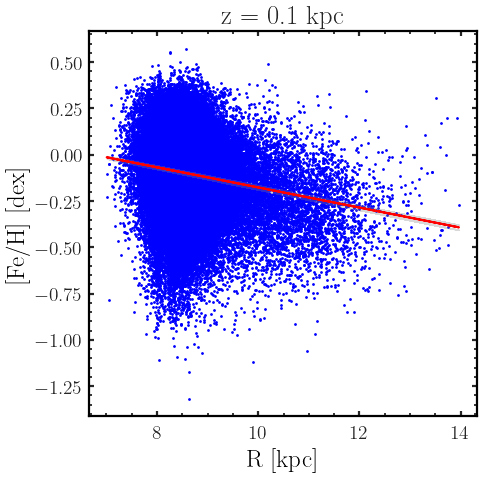

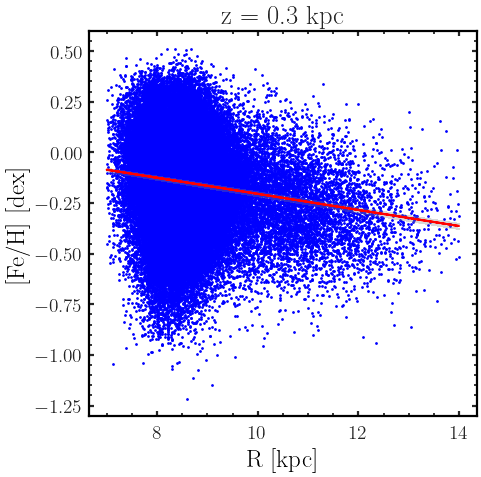

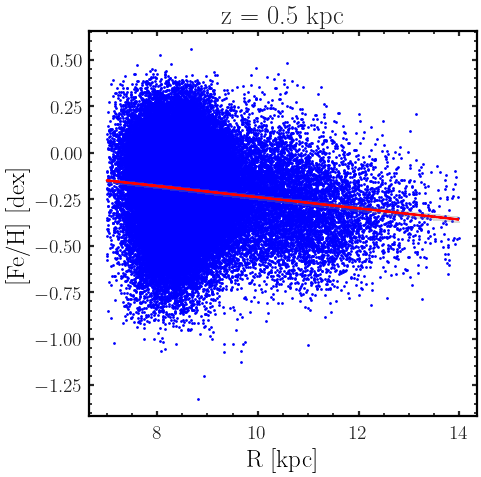

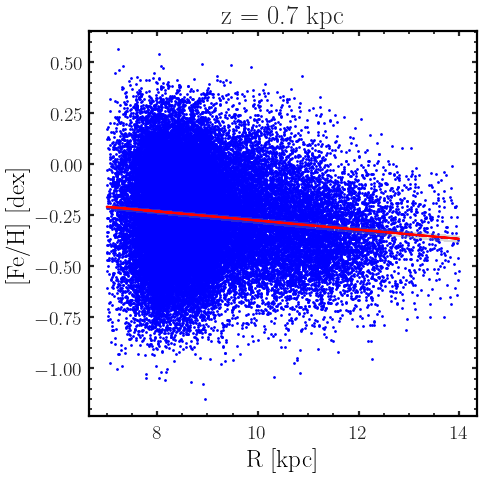

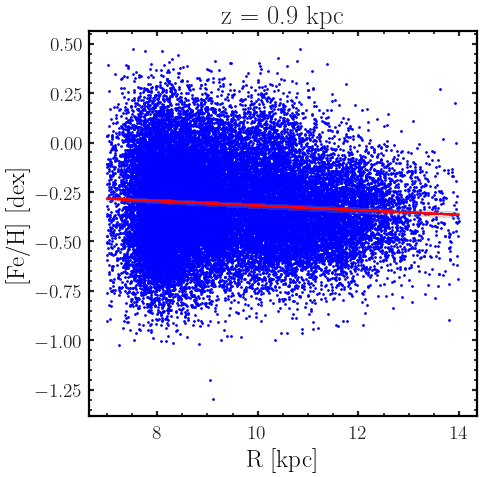

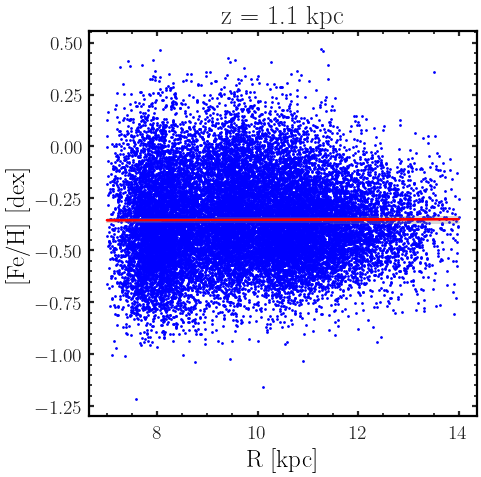

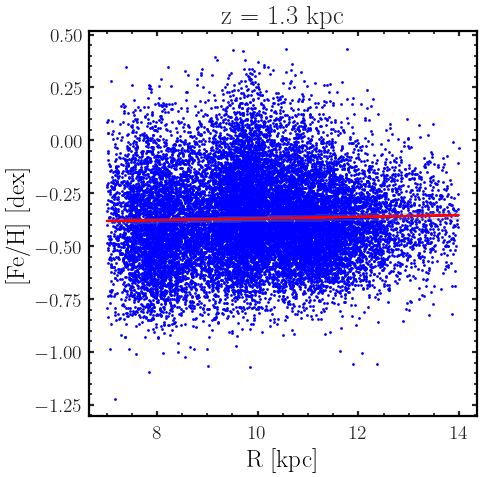

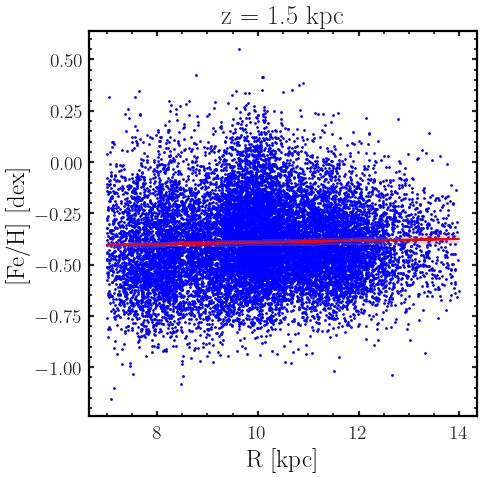

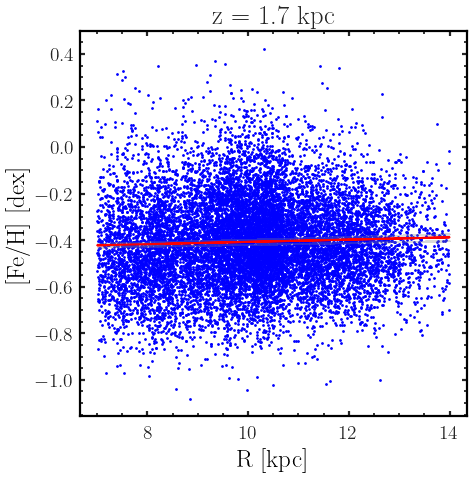

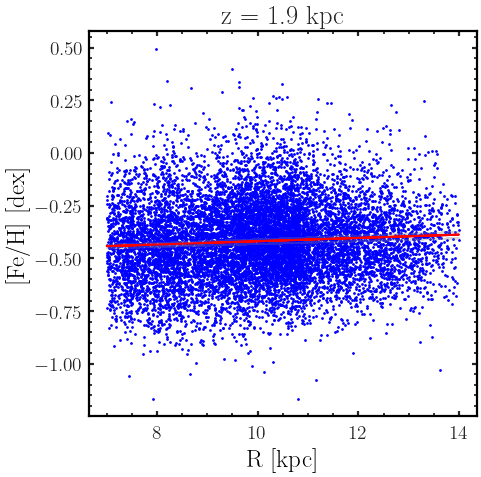

In [110]:
zbin = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
zcenter = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]

radial_gradient = pd.DataFrame(columns=['Z', 'slope', 'slope_err', 'br', 'br_err', 'N'])
radial_gradient['Z'] = zcenter

indices = np.digitize(data_z, bins=zbin)
for i in range(len(zcenter)):
    aux_data = data[indices == i+1]
    aux_r_full = aux_data['R']/1000
    aux_id = (aux_r_full <= 14) & (aux_r_full >= 7)
    aux_r = aux_r_full[aux_id]
    aux_feh = aux_data['cnn_feh'][aux_id]
    
    # linear fit
    aux_slope, aux_br, _, _, std_err = stats.linregress(aux_r, aux_feh)
    # calculte br err
    N = len(aux_r)
    mean_r = np.mean(aux_r)
    SS_rr = np.sum((aux_r - mean_r)**2)
    br_err = std_err * np.sqrt(np.sum(aux_r**2) / N)
    print(f'z = {zcenter[i]:.1f} kpc, slope = {aux_slope:.3f} ± {std_err:.3f}')
    
    # plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(aux_r, aux_feh, s=1, color='blue')
    ax.plot(aux_r, aux_slope * aux_r + aux_br, color='red', label=f'fit: y = {aux_slope:.3f}x + {aux_br:.3f}')
    # calculate error range
    y_fit = aux_slope * aux_r + aux_br
    y_fit_upper = (aux_slope + std_err) * aux_r + aux_br
    y_fit_lower = (aux_slope - std_err) * aux_r + aux_br
    # plot error range
    ax.fill_between(aux_r, y_fit_lower, y_fit_upper, color='gray', alpha=0.3, label=f'error: sigma_k = {std_err:.3f}')
    ax.set_xlabel('R [kpc]')
    ax.set_ylabel('[Fe/H] [dex]')
    ax.set_title(f'z = {zcenter[i]:.1f} kpc')
    
    radial_gradient.loc[i, 'slope'] = aux_slope
    radial_gradient.loc[i, 'slope_err'] = std_err
    radial_gradient.loc[i, 'br'] = aux_br
    radial_gradient.loc[i, 'br_err'] = br_err
    radial_gradient.loc[i, 'N'] = N

In [111]:
radial_gradient.to_csv('/Users/sara/PycharmProjects/specparam/data/final product/radial_gradient.csv', index=False)

## compare

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/787264194.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


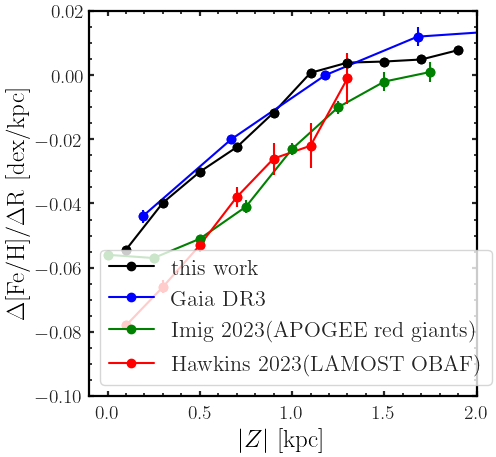

In [112]:
# gaia DR3 2023 table 1
# z_gaia = [0.17, 0.66, 1.17, 1.68]
# slope_gaia = [-0.055, -0.024, -0.006, -0.005]

# gaia DR3 2023 table 2 for giants
z_gaia = [0.19, 0.67, 1.18, 1.68, 2.19]
slope_gaia = [-0.044, -0.02, 0.0, 0.012, 0.014]
slope_gaia_err = [0.002, 0.001, 0.001, 0.003, 0.005]

# Hawkins 2023
z_hawkins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]
slope_hawikns = [-0.078, -0.066, -0.053, -0.038, -0.026, -0.022, -0.001]
slope_hawikns_err = [0.001, 0.002, 0.002, 0.003, 0.005, 0.007, 0.008]

# Imig 2023
z_imig= [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
slope_imig = [-0.056, -0.057, -0.051, -0.041, -0.023, -0.01, -0.002, 0.001]
slope_imig_err = [0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.003, 0.003]


fig, ax = plt.subplots(figsize=(5,5))
ax.plot(radial_gradient['Z'], radial_gradient['slope'], '-o', color='k', label='this work')
ax.errorbar(radial_gradient['Z'], radial_gradient['slope'], yerr=radial_gradient['slope_err'], fmt='o', color='k')

ax.plot(z_gaia, slope_gaia, '-o', color='b', label='Gaia DR3')
ax.errorbar(z_gaia, slope_gaia, yerr=slope_gaia_err, fmt='o', color='b')
ax.plot(z_imig, slope_imig, '-o', color='g', label='Imig 2023(APOGEE red giants)')
ax.errorbar(z_imig, slope_imig, yerr=slope_imig_err, fmt='o', color='g')
ax.plot(z_hawkins, slope_hawikns, '-o', color='r', label='Hawkins 2023(LAMOST OBAF)')
ax.errorbar(z_hawkins, slope_hawikns, yerr=slope_hawikns_err, fmt='o', color='r')

ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.1, 0.02)

ax.set_xlabel('$|Z|$'+' [kpc]')
ax.set_ylabel('$\\rm{\\Delta [Fe/H]/\\Delta{R}}$'+' [dex/kpc]')
ax.legend()
fig.show()

# Vertical metallicity gradient

In [113]:
data_r = data['R']/1000

R = 7.5 kpc, slope = -0.263 ± 0.002
R = 8.5 kpc, slope = -0.237 ± 0.001
R = 9.5 kpc, slope = -0.163 ± 0.001
R = 10.5 kpc, slope = -0.098 ± 0.002
R = 11.5 kpc, slope = -0.078 ± 0.002
R = 12.5 kpc, slope = -0.065 ± 0.003
R = 13.5 kpc, slope = -0.069 ± 0.006


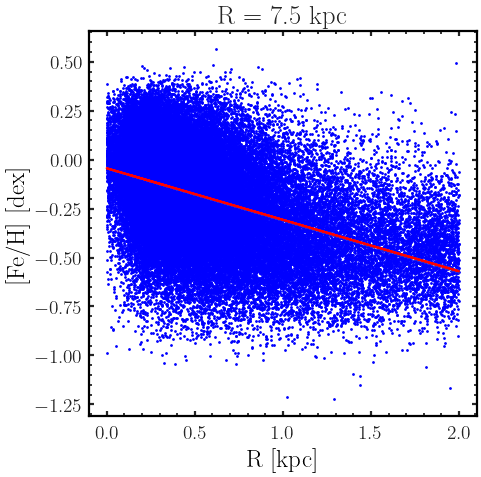

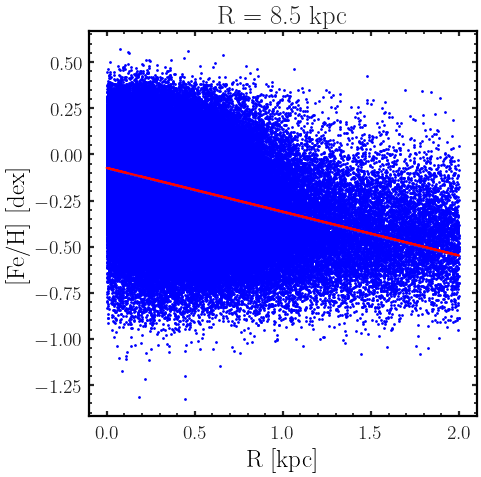

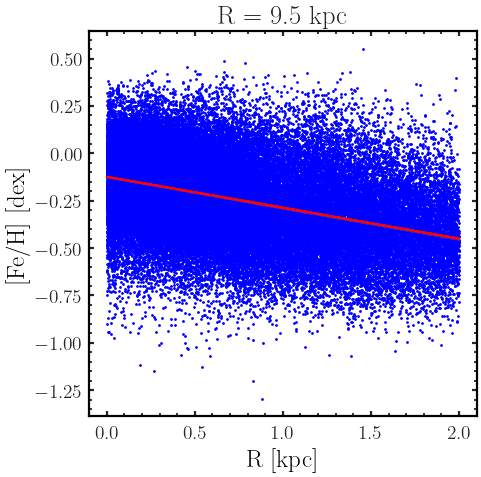

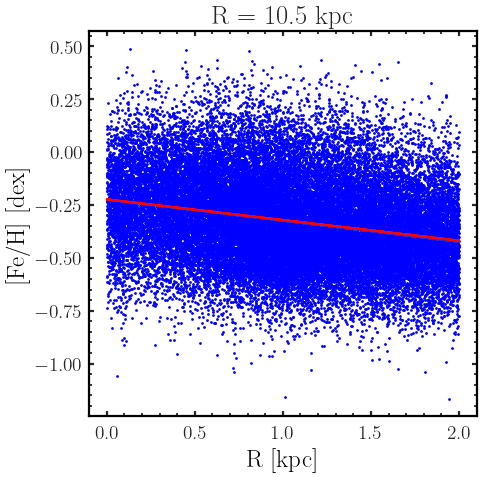

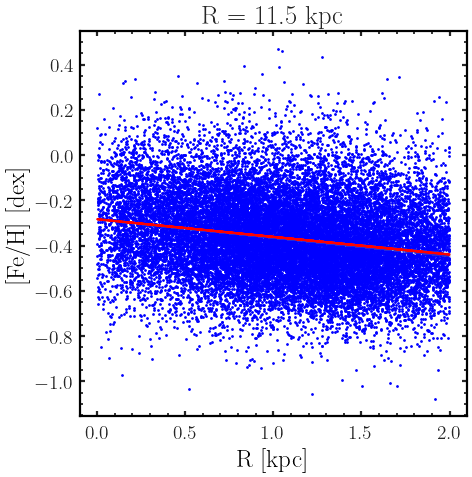

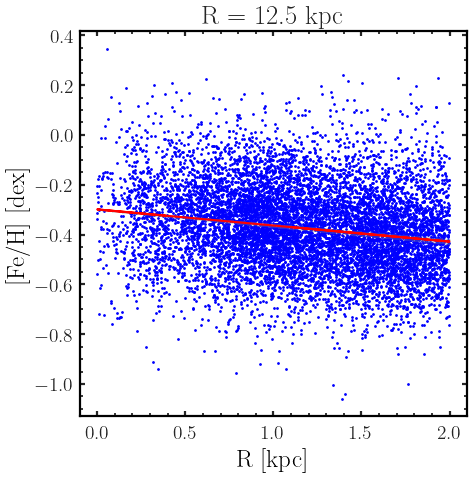

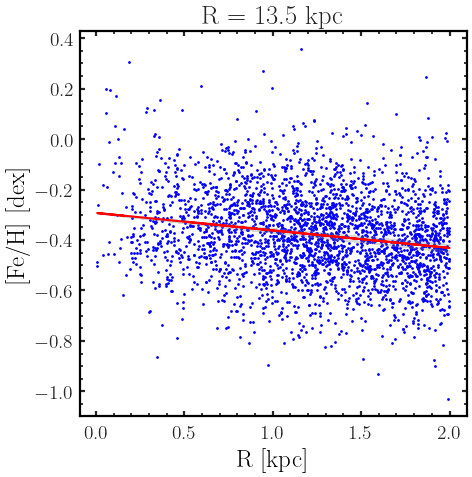

In [114]:
rbin = [7, 8, 9, 10, 11, 12, 13, 14]
rcenter = [7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]

vertical_gradient = pd.DataFrame(columns=['R', 'slope', 'slope_err', 'bz', 'bz_err', 'N'])
vertical_gradient['R'] = rcenter

indices = np.digitize(data_r, bins=rbin)
for i in range(len(rcenter)):
    aux_data = data[indices == i+1]
    aux_z_full = np.abs(aux_data['Z'])/1000
    aux_id = (aux_z_full <= 2.0)
    aux_z = aux_z_full[aux_id]
    aux_feh = aux_data['cnn_feh'][aux_id]

    # linear fit
    aux_slope, aux_bz, _, _, std_err = stats.linregress(aux_z, aux_feh)
    # calculte bz err
    N = len(aux_z)
    mean_z = np.mean(aux_z)
    SS_zz = np.sum((aux_z - mean_z)**2)
    bz_err = std_err * np.sqrt(np.sum(aux_z**2) / N)
    print(f'R = {rcenter[i]:.1f} kpc, slope = {aux_slope:.3f} ± {std_err:.3f}')
    
    # plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(aux_z, aux_feh, s=1, color='blue')
    ax.plot(aux_z, aux_slope * aux_z + aux_bz, color='red', label=f'fit: y = {aux_slope:.3f}x + {aux_bz:.3f}')
    # calculate error range
    y_fit = aux_slope * aux_z + aux_bz
    y_fit_upper = (aux_slope + std_err) * aux_z + aux_bz
    y_fit_lower = (aux_slope - std_err) * aux_z + aux_bz
    # plot error range
    ax.fill_between(aux_z, y_fit_lower, y_fit_upper, color='gray', alpha=0.3, label=f'error: sigma_k = {std_err:.3f}')
    ax.set_xlabel('R [kpc]')
    ax.set_ylabel('[Fe/H] [dex]')
    ax.set_title(f'R = {rcenter[i]:.1f} kpc')
    
    vertical_gradient.loc[i, 'slope'] = aux_slope
    vertical_gradient.loc[i, 'slope_err'] = std_err
    vertical_gradient.loc[i, 'bz'] = aux_bz
    vertical_gradient.loc[i, 'bz_err'] = bz_err
    vertical_gradient.loc[i, 'N'] = N

In [115]:
vertical_gradient.to_csv('/Users/sara/PycharmProjects/specparam/data/final product/vertical_gradient.csv', index=False)

## compare

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_40478/2108026291.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


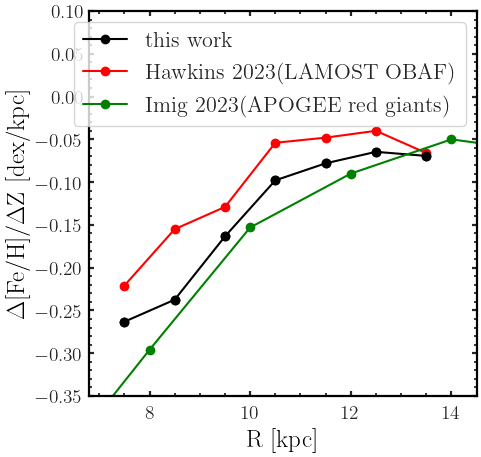

In [122]:
# Hawkins 2023
r_hawkins = [7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]
slope_hawkins = [-0.221, -0.155, -0.129, -0.054, -0.048, -0.040, -0.066]
slope_hawikns_err = [0.011, 0.009, 0.008, 0.008, 0.011, 0.022, 0.066]

# Imig 2023
r_imig = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]
slope_imig = [-0.4, -0.471, -0.462, -0.444, -0.296, -0.153, -0.09, -0.05, -0.066, -0.072]
slope_imig_err = [0.053, 0.015, 0.01, 0.011, 0.009, 0.007, 0.009, 0.017, 0.04]

fig, ax = plt.subplots(figsize=(5,5))

# ax.plot(vertical_gradient1['R'], vertical_gradient1['slope'], '-o', color='grey', label='this work')
ax.plot(vertical_gradient['R'], vertical_gradient['slope'], '-o', color='k', label='this work')
ax.errorbar(vertical_gradient['R'], vertical_gradient['slope'], yerr=vertical_gradient['slope_err'], fmt='o', color='k')

ax.plot(r_hawkins, slope_hawkins, '-o', color='r', label='Hawkins 2023(LAMOST OBAF)')
ax.plot(r_imig, slope_imig, '-o', color='g', label='Imig 2023(APOGEE red giants)')

ax.set_xlim(6.8, 14.5)
ax.set_ylim(-0.35, 0.1)

ax.set_xlabel('$\\rm{R}$'+' [kpc]')
ax.set_ylabel('$\\rm{\\Delta [Fe/H]/\\Delta{Z}}$'+' [dex/kpc]')
ax.legend()
fig.show()

# Final: vertical & radial

In [453]:
radial_gradient = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/radial_gradient.csv')
vertical_gradient = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/vertical_gradient.csv')

In [462]:
# radial
# gaia DR3 2023 table 2 for giants
z_gaia = [0.19, 0.67, 1.18, 1.68, 2.19]
zslope_gaia = [-0.044, -0.02, 0.0, 0.012, 0.014]
zslope_gaia_err = [0.002, 0.001, 0.001, 0.003, 0.005]

# Hawkins 2023
z_hawkins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]
zslope_hawikns = [-0.078, -0.066, -0.053, -0.038, -0.026, -0.022, -0.001]
zslope_hawikns_err = [0.001, 0.002, 0.002, 0.003, 0.005, 0.007, 0.008]

# Imig 2023
z_imig= [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
zslope_imig = [-0.056, -0.057, -0.051, -0.041, -0.023, -0.01, -0.002, 0.001]
zslope_imig_err = [0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.003, 0.003]

# vertical
# Hawkins 2023
r_hawkins = [7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]
rslope_hawkins = [-0.221, -0.155, -0.129, -0.054, -0.048, -0.040, -0.066]
rslope_hawikns_err = [0.011, 0.009, 0.008, 0.008, 0.011, 0.022, 0.066]

# Imig 2023
r_imig = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]
rslope_imig = [-0.4, -0.471, -0.462, -0.444, -0.296, -0.153, -0.09, -0.05, -0.066, -0.072]
rslope_imig_err = [0.053, 0.015, 0.01, 0.011, 0.009, 0.007, 0.007, 0.009, 0.017, 0.04]

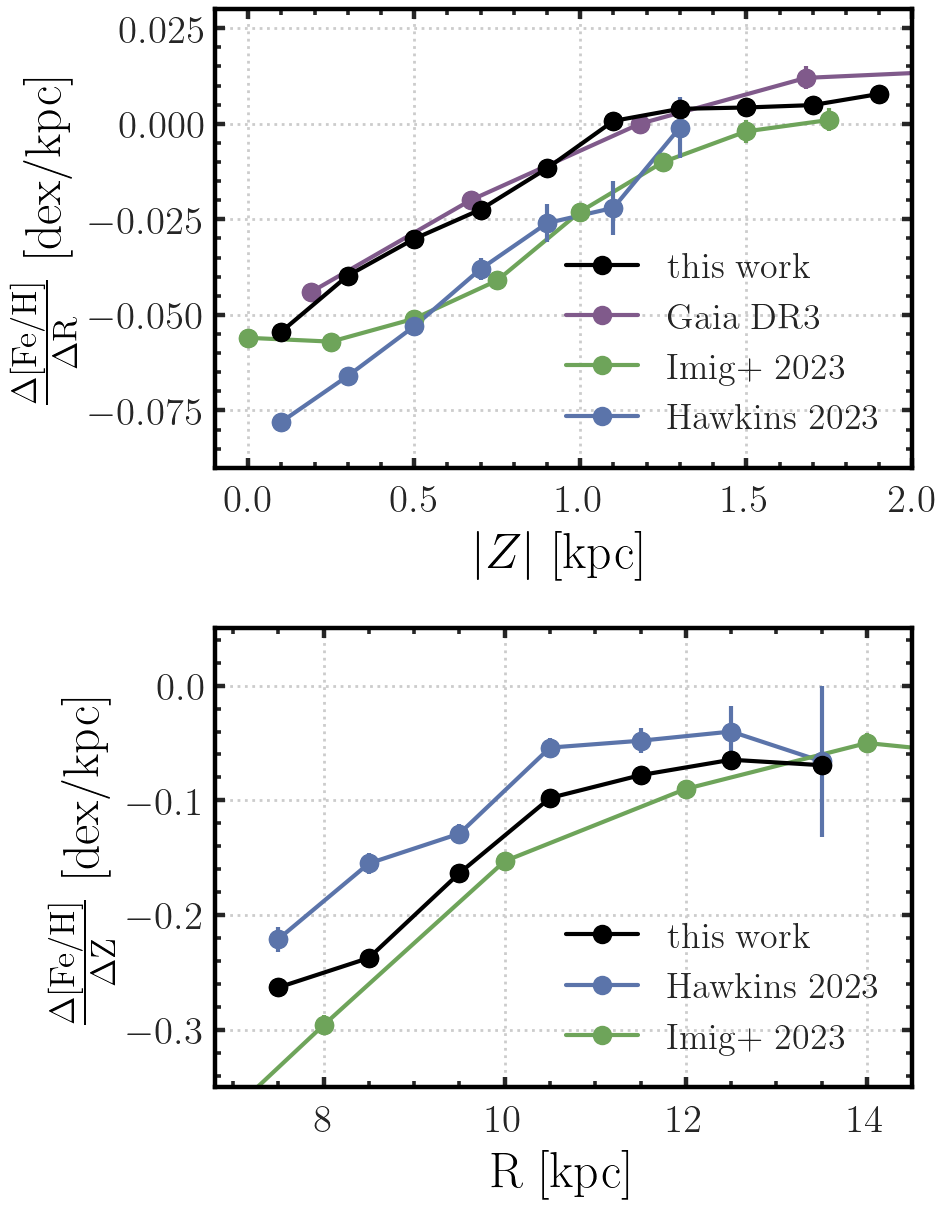

In [505]:
fig = plt.figure(figsize=(4.5, 7.), dpi=200)
gs = GridSpec(2, 1, figure=fig, hspace=0.35, wspace=0.35)

# radial
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(radial_gradient['Z'], radial_gradient['slope'], '-o', color='k', label='this work', zorder=10)
ax1.errorbar(radial_gradient['Z'], radial_gradient['slope'], yerr=radial_gradient['slope_err'], fmt='o', color='k')
# literature
ax1.plot(z_gaia, zslope_gaia, '-o', color='#805A8B', label='Gaia DR3')
ax1.errorbar(z_gaia, zslope_gaia, yerr=zslope_gaia_err, fmt='o', color='#805A8B')
ax1.plot(z_imig, zslope_imig, '-o', color='#6EA45A', label='Imig+ 2023')
ax1.errorbar(z_imig, zslope_imig, yerr=zslope_imig_err, fmt='o', color='#6EA45A')
ax1.plot(z_hawkins, zslope_hawikns, '-o', color='#5B74AA', label='Hawkins 2023')
ax1.errorbar(z_hawkins, zslope_hawikns, yerr=zslope_hawikns_err, fmt='o', color='#5B74AA')

# vertical
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(vertical_gradient['R'], vertical_gradient['slope'], '-o', color='k', label='this work', zorder=10)
ax2.errorbar(vertical_gradient['R'], vertical_gradient['slope'], yerr=vertical_gradient['slope_err'], fmt='o', color='k')
# literature
ax2.plot(r_hawkins, rslope_hawkins, '-o', color='#5B74AA', label='Hawkins 2023')
ax2.errorbar(r_hawkins, rslope_hawkins, yerr=rslope_hawikns_err, fmt='o', color='#5B74AA')
ax2.plot(r_imig, rslope_imig, '-o', color='#6EA45A', label='Imig+ 2023')
ax2.errorbar(r_imig, rslope_imig, yerr=rslope_imig_err, fmt='o', color='#6EA45A')

ax1.set_xlim(-0.1, 2.0)
ax1.set_ylim(-0.09, 0.03)

ax1.set_xlabel('$|Z|$'+' [kpc]')
ax1.set_ylabel('$\\rm{\\frac{\\Delta [Fe/H]}{\\Delta{R}}}$'+' [dex/kpc]')

ax2.set_xlim(6.8, 14.5)
ax2.set_ylim(-0.35, 0.05)
ax2.set_xlabel('$\\rm{R}$'+' [kpc]')
ax2.set_ylabel('$\\rm{\\frac{\\Delta [Fe/H]}{\\Delta{Z}}}$'+' [dex/kpc]')

legend_fontsize=13
ax1.legend(fontsize=legend_fontsize, frameon=False)
ax2.legend(fontsize=legend_fontsize, frameon=False)

ax1.grid(True, linestyle=':', linewidth=1)
ax2.grid(True, linestyle=':', linewidth=1)

fig.savefig('../figure/comp_gradients.png', bbox_inches=None)

In [457]:
len(z_imig)

8

In [459]:
slope_imig

[-0.4, -0.471, -0.462, -0.444, -0.296, -0.153, -0.09, -0.05, -0.066, -0.072]